In [27]:
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt


# To improve readibility and understanding of the code you can try to use comments on your lines of code 


parameters = {
   "beginDate" : "01/01/2014",
   "endDate" : "15/01/2024"}

parameters2 = {"granularity": "annual"}

url = "https://ec.europa.eu/agrifood/api/oliveOil/prices?"
url2 = "https://ec.europa.eu/agrifood/api/oliveOil/production?"

response = requests.get(url, params=parameters)
response.json()
df = pd.DataFrame.from_dict(response.json())


"""
#response = requests.get(url, params=parameters)
#response.json()                                              -- In this line of code, there is no need to call twice the method json()
#df = pd.DataFrame.from_dict(response.json())
"""                                                                         



response2 = requests.get(url2, params=parameters2)
response2.json()
df2 = pd.DataFrame.from_dict(response2.json())

###CLEANING DATA###

df = df.rename(columns={'memberStateName': 'country', 'beginDate': 'date', 'marketingYear': 'campaign'})
columns_to_remove = ['endDate']
df.drop(columns_to_remove, axis=1, inplace=True)
df = df.drop(["memberStateCode", "market", "weekNumber"], axis=1)

df2 = df2.rename(columns={'memberStateName': 'country', 'marketingYear': 'campaign', 'yearProductionQuantity':'production'})
columns_to_remove = ['memberStateCode','productionYear', 'endingStockQuantity']
df2.drop(columns_to_remove, axis=1, inplace=True)

to_drop=df2[df2["country"]=="Cyprus"].index
df2.drop(index=to_drop,inplace=True)
df2["country"].value_counts()

country
Croatia     12
France      12
Greece      12
Italy       12
Slovenia    12
Portugal    11
Spain       11
Malta        4
Name: count, dtype: int64

In [28]:
df2

,country,campaign,production
0,Croatia,2023/24,2.50
1,France,2023/24,4.50
2,Greece,2023/24,175.00
3,Italy,2023/24,288.90
4,Portugal,2023/24,0.15
...,...,...,...
92,France,2012/13,5.12
93,Greece,2012/13,358.00
94,Italy,2012/13,409.14
95,Malta,2012/13,0.04


In [29]:
#1. What are the total olive oil price and production over the past 10 years?
#(price and time)
df2_production = df2.groupby("country").agg({"production":"sum"})
df2_production

,production
country,
Croatia,44.22
France,49.08
Greece,3133.50
Italy,3850.67
Malta,0.14
Portugal,1142.25
Slovenia,5.83
Spain,13786.11


In [30]:
df["price"] = df["price"].replace("[\€,]", "", regex=True).astype(float)
df_price = df.groupby(["country"]).agg({"price":"mean"}).round(2)
df_price

"""
Nice usage of groupby function for an easy understanting of the relation between mean price of olive per Country.
Nice work on replacing the names to improve understanding of DataFrame.
"""

,price
country,
Croatia,737.20
France,1226.15
Greece,288.80
Italy,339.15
Malta,2911.20
Portugal,337.42
Slovenia,1810.96
Spain,279.54


In [31]:
df3 = pd.merge(df_price, df2_production, on="country", how= "inner")


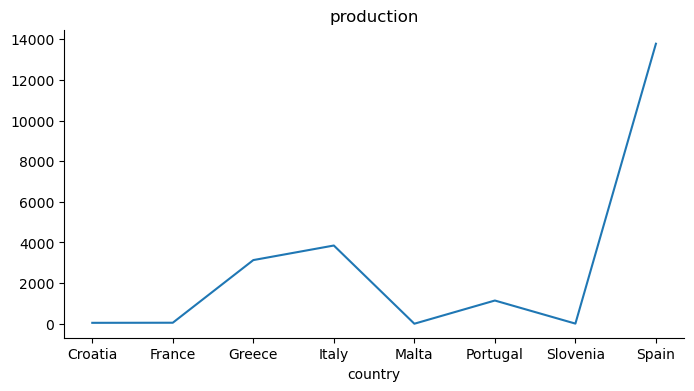

In [32]:
df3['production'].plot(kind='line', figsize=(8, 4), title='production')
plt.gca().spines[['top', 'right']].set_visible(False)

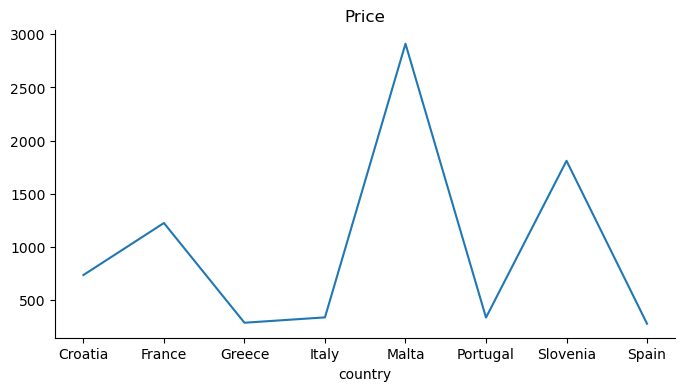

In [33]:
df3['price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
display(df3)

,price,production
country,,
Croatia,737.20,44.22
France,1226.15,49.08
Greece,288.80,3133.50
Italy,339.15,3850.67
Malta,2911.20,0.14
Portugal,337.42,1142.25
Slovenia,1810.96,5.83
Spain,279.54,13786.11


In [36]:
df3.reset_index(inplace=True)  #Nice practicing reseting the indexes, facilitates the readability of the code. 

In [38]:
display(df3)

,country,price,production
0,Croatia,737.20,44.22
1,France,1226.15,49.08
2,Greece,288.80,3133.50
3,Italy,339.15,3850.67
4,Malta,2911.20,0.14
5,Portugal,337.42,1142.25
6,Slovenia,1810.96,5.83
7,Spain,279.54,13786.11


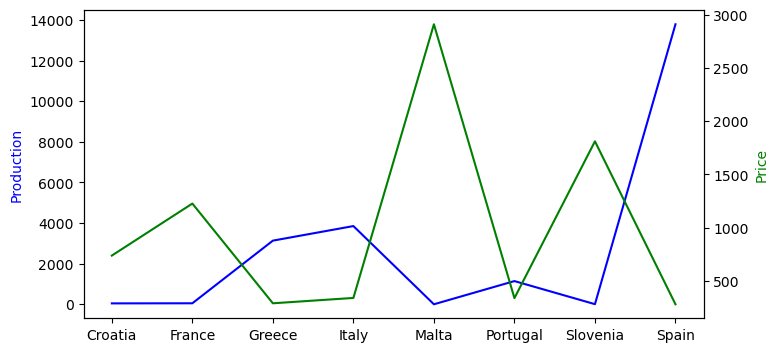

In [37]:
    """
    For better understanding of the realations between the two variables it gets easier in the same graph.
Just  a minnor comment the unnecessary use of import libraries everytime you want to create a graph, there's no need to make the code heavier.
    """
    
    
fig,ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df3["country"], df3["production"], color="blue")
plt.ylabel("Production", c = "Blue")
ax2 = ax1.twinx()
ax2.plot(df3["country"], df3["price"], color="green")
plt.ylabel("Price", c = "Green")
plt.show()

In [11]:
#2.Which Member States are the major producers of olive oil?
#(countries and production)

df_max = df2.groupby(['country', 'campaign']).agg({'production':'max'})
df_max.sort_values(by= 'production', axis=0, ascending=False)

#didn't use this information

production
country campaign            
Spain   2018/19      1789.90
        2013/14      1775.80
        2021/22      1491.46
        2015/16      1397.90
        2020/21      1389.00
...                      ...
Malta   2013/14         0.04
        2012/13         0.04
        2015/16         0.04
        2014/15         0.02
France  2013/14         0.00

[86 rows x 1 columns]

In [12]:
#3. Which markets have the highest and lowest olive oil prices?(countries and prices)

df_sales = df.groupby(['country']).agg({'price':'max'})
df_sales.sort_values(by= 'price', axis=0, ascending=False)

,price
country,
Malta,2934.00
Slovenia,1845.00
Croatia,1566.89
France,1494.00
Italy,968.00
Spain,930.00
Greece,896.50
Portugal,880.00


In [13]:

#4. How has production evolved in these countries over time?
#(time, countries, production)

df_flut = df2.groupby(['campaign','country']).agg({'production':'sum'})
df_pivot = df2.pivot_table(index="country", columns= "campaign", values="production", aggfunc='sum')
df_pivot.T

country,Croatia,France,Greece,Italy,Malta,Portugal,Slovenia,Spain
campaign,,,,,,,,
2012/13,5.50,5.12,358.0,409.14,0.04,NaN,0.24,NaN
2013/14,5.00,0.00,132.0,461.24,0.04,91.65,0.60,1775.80
2014/15,1.17,1.90,295.0,222.00,0.02,64.15,0.21,837.60
2015/16,3.54,4.98,320.0,474.62,0.04,109.13,0.49,1397.90
2016/17,3.45,3.29,195.0,182.33,NaN,69.42,0.35,1286.60
2017/18,3.88,6.24,346.0,428.92,NaN,134.77,0.35,1260.10
2018/19,3.36,5.80,185.0,173.60,NaN,100.32,0.90,1789.90
2019/20,4.09,3.37,275.0,366.47,NaN,140.50,0.30,1125.28
2020/21,3.71,4.55,275.0,273.50,NaN,100.00,0.90,1389.00
